## Decision Tree ana XGBoost Algorithm Application with Random Generated Samples: 

* Generating dataset using `make_classification` function in the sklearn.datasets class.
* Generating 10000 samples with 8 features (X) with one label (y). 
* Exploring and analyse raw data.
* Doing preprocessing for classification.
* Splitting your dataset into train and test test (0.7 for train and 0.3 for test).
* Trying Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV)


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings ("ignore")

In [2]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.

X,y = make_classification(n_samples=10000, n_features=8, n_informative=5, class_sep=2,random_state=42)
X = pd.DataFrame(X)
y = pd.Series(y)



In [3]:
type(X)

pandas.core.frame.DataFrame

In [4]:
X["y"]=y

In [5]:
X

,0,1,2,3,4,5,6,7,y
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0
...,...,...,...,...,...,...,...,...,...
9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,0
9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,0
9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1
9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1


In [6]:
y

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Length: 10000, dtype: int64

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   y       10000 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 703.2 KB


In [8]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
0,10000.0,-1.004918,2.125161,-7.361942,-2.575438,-1.448219,0.666344,6.445003
1,10000.0,0.982548,2.236374,-6.334871,-0.418504,1.414705,2.548942,7.784181
2,10000.0,0.003020,1.016612,-3.531879,-0.673464,0.013764,0.680873,3.443926
3,10000.0,1.071892,2.571314,-6.507147,-1.196634,1.182811,3.296581,8.484377
4,10000.0,0.995967,2.161592,-6.124101,-0.507065,1.478394,2.529939,7.824402
5,10000.0,-1.869138,2.587044,-10.552410,-3.750591,-1.769049,0.072616,5.853682
6,10000.0,-0.001747,2.446634,-8.263252,-1.984409,0.215688,1.985890,6.944183
7,10000.0,0.994744,2.266276,-6.274545,-0.594088,1.373192,2.617999,7.815690
y,10000.0,0.499400,0.500025,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
# Check duplicate values and missing data.
X.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
y    0
dtype: int64

In [10]:
X.duplicated().sum() #no duplicated variables

0

In [11]:
X.groupby(by=y).count()

,0,1,2,3,4,5,6,7,y
0,5006,5006,5006,5006,5006,5006,5006,5006,5006
1,4994,4994,4994,4994,4994,4994,4994,4994,4994


In [12]:
X.y.value_counts()

0    5006
1    4994
Name: y, dtype: int64

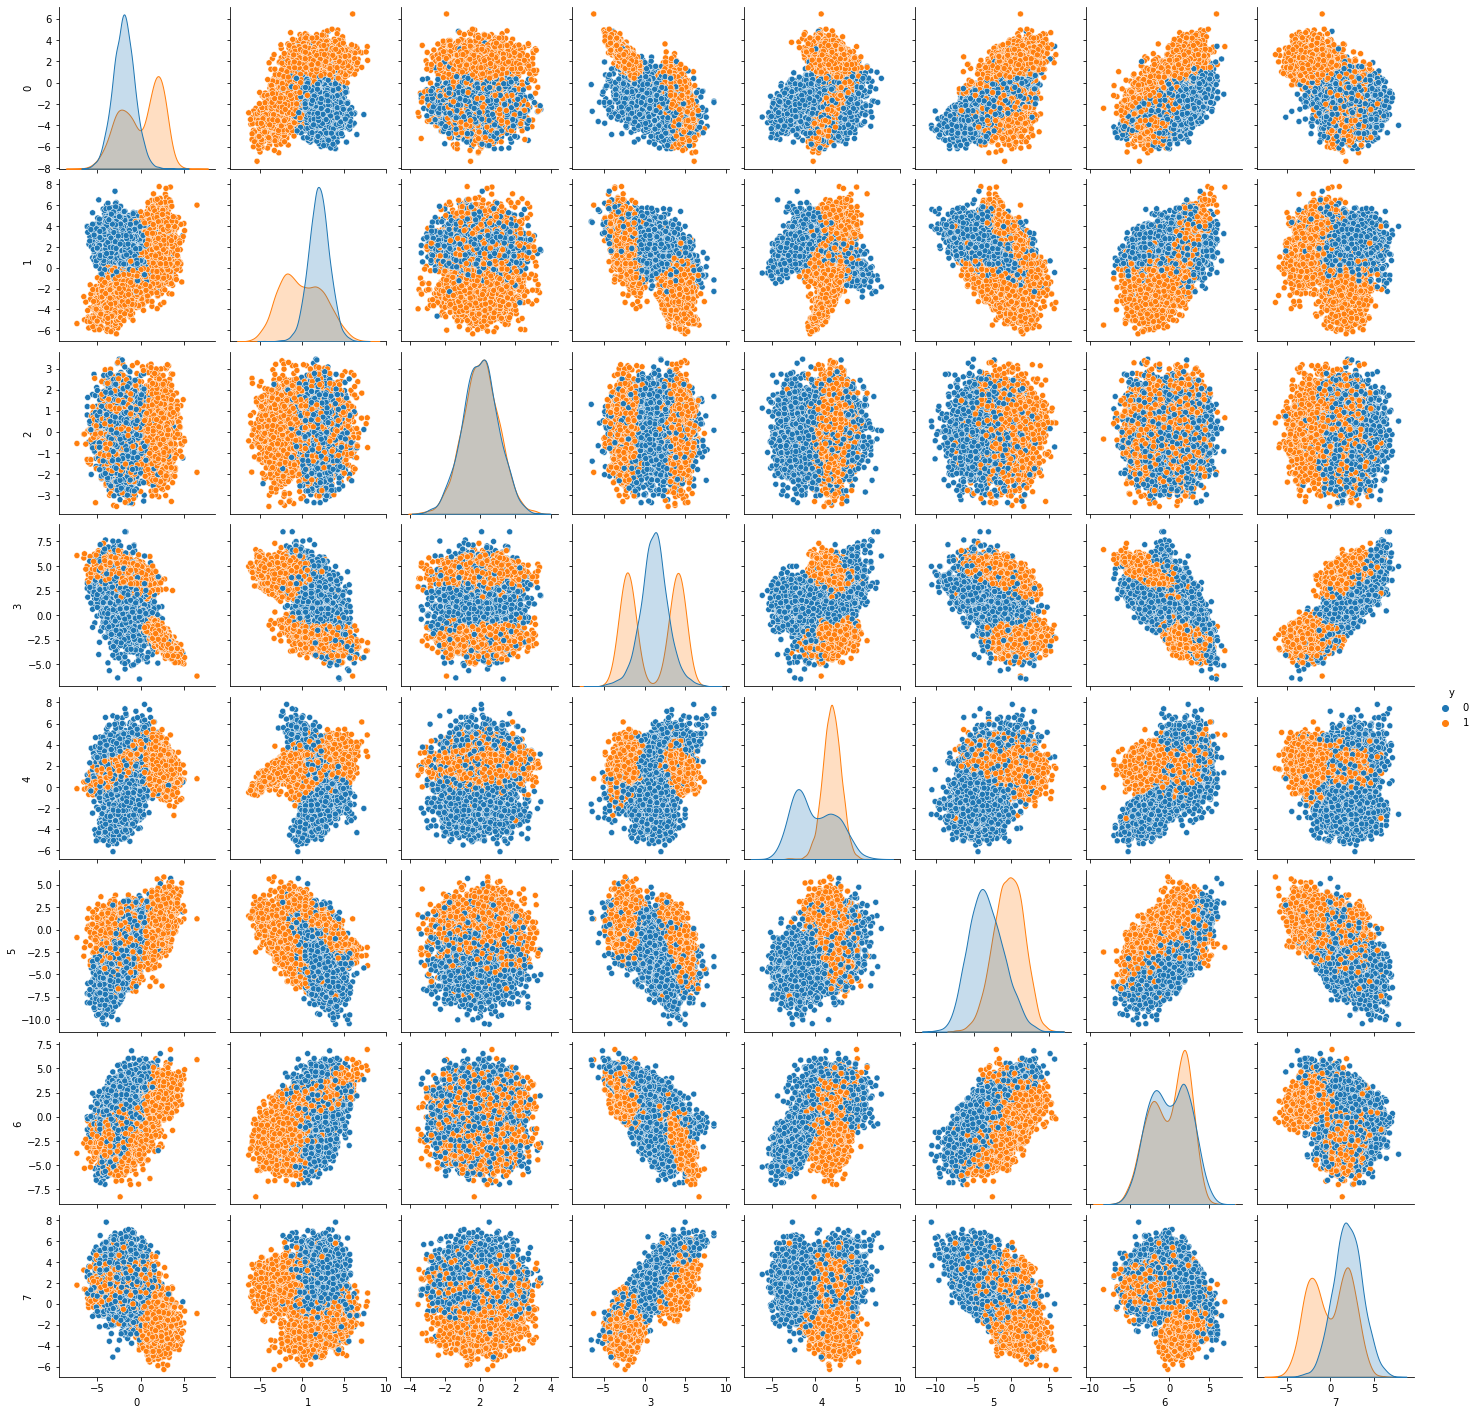

In [13]:
# Visualize data for each feature (pairplot,distplot).
sns.pairplot(X, hue="y");

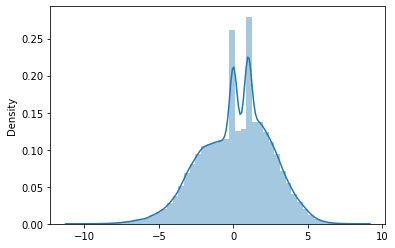

In [14]:
sns.distplot(X ,kde=True);

In [14]:
# Draw correlation matrix.
X.corr()

,0,1,2,3,4,5,6,7,y
0,1.000000,0.235306,0.019813,-0.705908,0.310024,0.635628,0.545522,-0.636540,0.465898
1,0.235306,1.000000,-0.001988,-0.618075,-0.180396,-0.347091,0.469165,-0.129568,-0.444298
2,0.019813,-0.001988,1.000000,-0.010795,0.027022,0.023192,0.020194,-0.018107,0.018144
3,-0.705908,-0.618075,-0.010795,1.000000,0.086099,-0.439463,-0.672497,0.758458,-0.034356
4,0.310024,-0.180396,0.027022,0.086099,1.000000,0.461343,0.465025,-0.176576,0.460011
5,0.635628,-0.347091,0.023192,-0.439463,0.461343,1.000000,0.547131,-0.647011,0.560296
6,0.545522,0.469165,0.020194,-0.672497,0.465025,0.547131,1.000000,-0.388518,0.002034
7,-0.636540,-0.129568,-0.018107,0.758458,-0.176576,-0.647011,-0.388518,1.000000,-0.439571
y,0.465898,-0.444298,0.018144,-0.034356,0.460011,0.560296,0.002034,-0.439571,1.000000


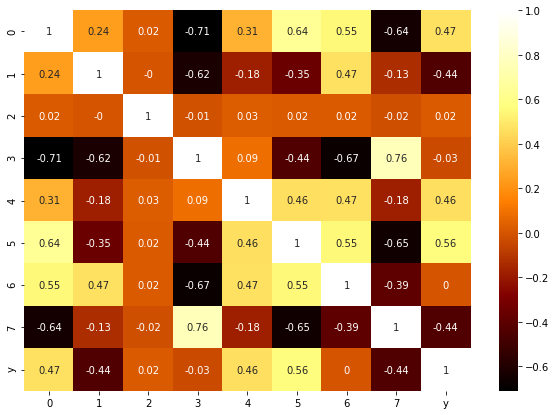

In [15]:
plt.figure(figsize=(10, 7))
sns.heatmap(data=X.corr().round(2), cmap='afmhot', annot=True, annot_kws={"size":10})
plt.show()

In [16]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)


In [17]:
df_corr=X.corr()
df_corr.head()

,0,1,2,3,4,5,6,7,y
0,1.000000,0.235306,0.019813,-0.705908,0.310024,0.635628,0.545522,-0.636540,0.465898
1,0.235306,1.000000,-0.001988,-0.618075,-0.180396,-0.347091,0.469165,-0.129568,-0.444298
2,0.019813,-0.001988,1.000000,-0.010795,0.027022,0.023192,0.020194,-0.018107,0.018144
3,-0.705908,-0.618075,-0.010795,1.000000,0.086099,-0.439463,-0.672497,0.758458,-0.034356
4,0.310024,-0.180396,0.027022,0.086099,1.000000,0.461343,0.465025,-0.176576,0.460011


In [18]:
threshold=0.8
columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
selected_columns
X = X[selected_columns]
X.head()

,0,1,2,3,4,5,6,7,y
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0


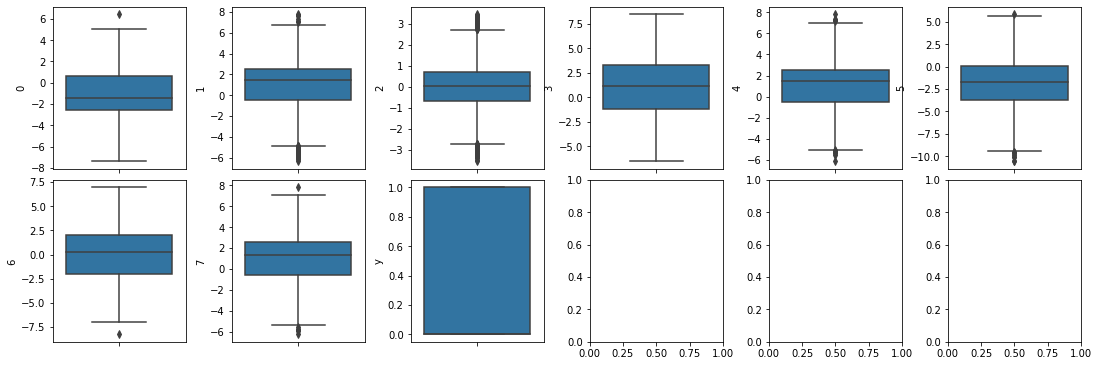

In [19]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in X.columns:
  sns.boxplot(y=i, data=X, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

In [20]:
for i in X.columns:
  X.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(X[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = X[i][(X[i] < lower_bound) | (X[i] > upper_bound)] #creating a series of outlier data
  perc = (outlier_data.count()/X[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))
  #----------------------code below is for comming sections----------------------
  if i == '1':
    outlierData1_index = outlier_data.index
    outlierData1_LB = X[i][(X[i] < lower_bound)]
    outlierData1_UB = X[i][(X[i] > upper_bound)]
  elif i == '2':
    outlierData2_index = outlier_data.index
    outlierData2_LB = X[i][(X[i] < lower_bound)]
    outlierData2_UB = X[i][(X[i] > upper_bound)]
  elif i == '4':
    outlierData4_index = outlier_data.index
    outlierData4_LB = X[i][(X[i] < lower_bound)]
    outlierData4_UB = X[i][(X[i] > upper_bound)]
  elif i == '5':
    outlierData5_index = outlier_data.index
    outlierData5_LB = X[i][(X[i] < lower_bound)]
    outlierData5_UB = X[i][(X[i] > upper_bound)]
  elif i == '7':
    outlierData7_index = outlier_data.index
    outlierData7_LB = X[i][(X[i] < lower_bound)]
    outlierData7_UB = X[i][(X[i] > upper_bound)]
  elif i == 'y':
    lowerBoundMEDV = lower_bound
    upperBoundMEDV = upper_bound

Outliers in 0 is 0.01% with count 1
Outliers in 1 is 0.63% with count 63
Outliers in 2 is 0.93% with count 93
Outliers in 3 is 0.00% with count 0
Outliers in 4 is 0.12% with count 12
Outliers in 5 is 0.10% with count 10
Outliers in 6 is 0.01% with count 1
Outliers in 7 is 0.06% with count 6
Outliers in y is 0.00% with count 0


In [21]:
#there is no outliers. but we have high correlation 3 and 7. We have to cut them off.

In [22]:
X2=X.copy()

In [23]:
X

,0,1,2,3,4,5,6,7,y
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0
...,...,...,...,...,...,...,...,...,...
9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,0
9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,0
9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1
9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1


In [24]:
X2

,0,1,2,3,4,5,6,7,y
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0
...,...,...,...,...,...,...,...,...,...
9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,0
9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,0
9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1
9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1


In [25]:
del X2[3]


In [26]:
del X2[7]

In [27]:
X

,0,1,2,3,4,5,6,7,y
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0
...,...,...,...,...,...,...,...,...,...
9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,0
9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,0
9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1
9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1


In [28]:
X2

,0,1,2,4,5,6,y
0,-0.475055,1.455643,-1.571111,-2.272510,-0.478333,0.012107,0
1,1.578351,4.611229,-0.527495,2.921311,-1.783386,3.431662,1
2,-2.677604,0.619333,-0.260753,1.511900,-1.552257,1.182059,0
3,0.379412,0.879235,-0.787970,3.388700,1.787840,4.294263,0
4,-3.645689,3.371521,-2.061152,-0.169329,-2.487230,2.144342,0
...,...,...,...,...,...,...,...
9995,-2.399057,2.275687,-0.345061,3.397411,-1.502344,3.098817,0
9996,-1.487918,2.273560,-1.152804,-0.571202,-5.398310,-2.426969,0
9997,0.425978,4.298317,0.536100,1.370092,-3.187447,1.306534,1
9998,-1.182084,0.628536,0.848320,3.057226,-4.759462,-2.439117,1


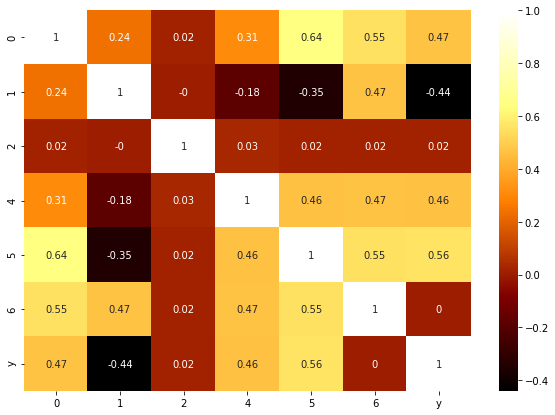

In [29]:
plt.figure(figsize=(10, 7))
sns.heatmap(data=X2.corr().round(2), cmap='afmhot', annot=True, annot_kws={"size":10})
plt.show()

In [30]:
# Split dataset into train and test set

In [31]:
X, y = X2.iloc[: , :-1], X2.iloc[: , -1]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape

(7000, 6)

In [33]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.

In [34]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.956
Accuracy of test: 0.9543333333333334


In [35]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=100, min_samples_split=4, max_leaf_nodes=5, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9374285714285714
Accuracy of test: 0.936


In [36]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9908571428571429
Accuracy of test: 0.9753333333333334


In [37]:
# Visualize feature importances.

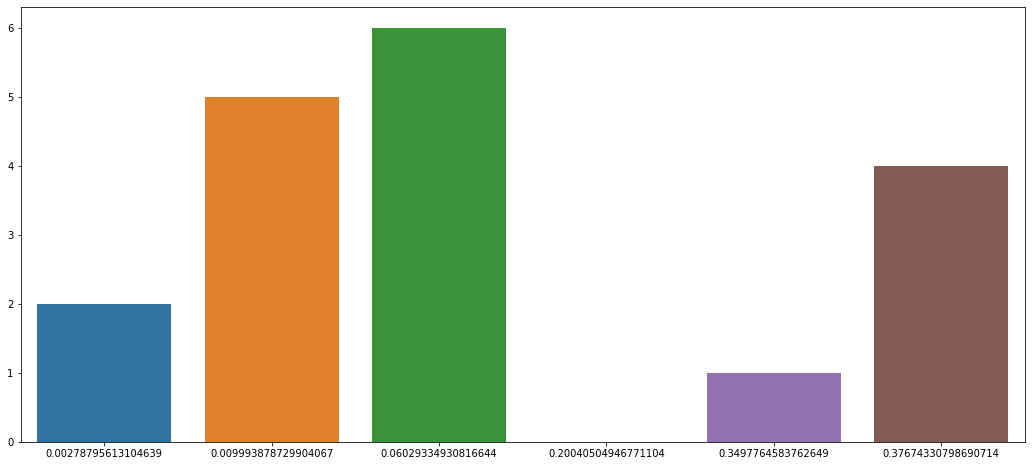

In [38]:
plt.figure(figsize=(18, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [40]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

In [46]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1468
           1       0.98      0.97      0.98      1532

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [87]:
col_mapping = X.iloc[:,:7]

,0,1,2,4,5,6
0,-0.475055,1.455643,-1.571111,-2.272510,-0.478333,0.012107
1,1.578351,4.611229,-0.527495,2.921311,-1.783386,3.431662
2,-2.677604,0.619333,-0.260753,1.511900,-1.552257,1.182059
3,0.379412,0.879235,-0.787970,3.388700,1.787840,4.294263
4,-3.645689,3.371521,-2.061152,-0.169329,-2.487230,2.144342
...,...,...,...,...,...,...
9995,-2.399057,2.275687,-0.345061,3.397411,-1.502344,3.098817
9996,-1.487918,2.273560,-1.152804,-0.571202,-5.398310,-2.426969
9997,0.425978,4.298317,0.536100,1.370092,-3.187447,1.306534
9998,-1.182084,0.628536,0.848320,3.057226,-4.759462,-2.439117


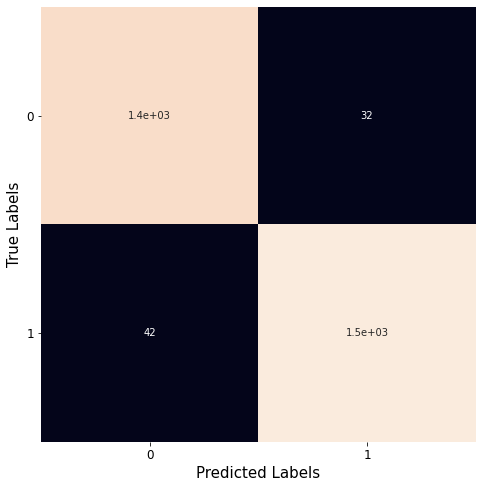

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(18, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(col_mapping, fontsize = 12)
ax.yaxis.set_ticklabels(col_mapping, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [48]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9752791267099234
Recall = 0.9753932456371255
Accuracy = 0.9753333333333334
F1 Score = 0.9753253387430861


In [49]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.

In [50]:
import xgboost as xgb

In [51]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [52]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

[19:53:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [53]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.00488765, 0.99202394, 0.00308847],
       [0.9899323 , 0.00774804, 0.00231972],
       [0.95739794, 0.03767503, 0.00492702],
       [0.14966185, 0.8346616 , 0.01567653],
       [0.00950397, 0.9866311 , 0.00386488],
       [0.9858824 , 0.01180736, 0.00231023],
       [0.99594927, 0.0022569 , 0.00179376],
       [0.6547585 , 0.33371744, 0.01152406],
       [0.99594927, 0.0022569 , 0.00179376],
       [0.9925156 , 0.00501824, 0.00246618]], dtype=float32)

In [54]:
best_preds = np.asarray([np.argmax(line) for line in preds])


In [55]:
best_preds

array([1, 0, 0, ..., 1, 0, 1])

In [56]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9762773503606708
Recall = 0.9764008153043874
Accuracy = 0.9763333333333334


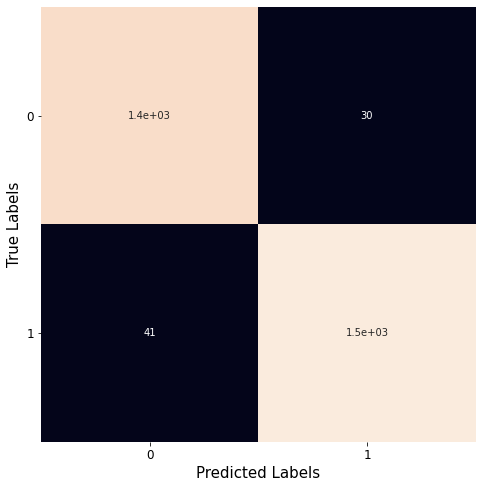

In [57]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(X2, fontsize = 12)
ax.yaxis.set_ticklabels(X2,  fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [90]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,5,7),
    'min_child_weight':range(1,10),
    'learning_rate': [0.0001,0.1,1],
    'n_estimators': [10,500,1000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,num_class=4,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

KeyboardInterrupt: 

In [ ]:
# Visualize feature importances.

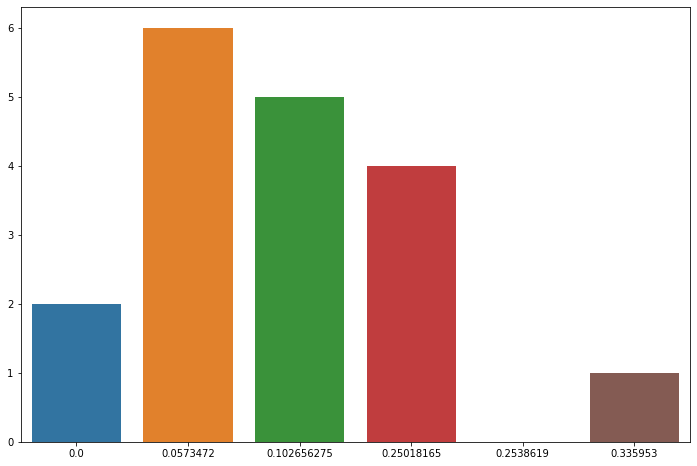

In [73]:
plt.figure(figsize=(12, 8))
importance = clf.best_estimator_.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [65]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

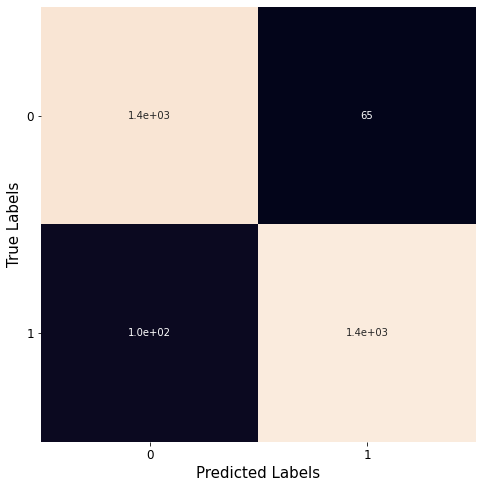

In [74]:
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(X2, fontsize = 12)
ax.yaxis.set_ticklabels(X2, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()